# Inhaltsverzeichnis

| Abschnitt |
|-----------|
| [Tägliche Brandhäufigkeiten visualisieren](#taegliche-brandhaeufigkeiten-visualisieren) |
| [Erstellung von Abbildungen: Häufigkeit von Bränden in verschiedenen Zeiträumen](#erstellung-von-abbildungen:-haeufigkeit-von-braenden-in-verschiedenen-zeitraeumen) |
| [Täglich "Log Fire counts" Verteilung](#taeglich-"log-fire-counts"-verteilung) |


# Tägliche Brandhäufigkeiten visualisieren

Dieser Code berechnet und visualisiert die **täglichen Brandhäufigkeiten**:
- Die Anzahl der Brände wird für jeden Tag berechnet.
- Ein 7-Tage gleitender Durchschnitt wird angewendet, um Trends zu glätten.
- Wärmere Monate (März–September) werden orange hervorgehoben, kältere Monate grau.

Die Abbildung wird als `daily_fire_frequency.png` im Ordner `Abbildungen` gespeichert.


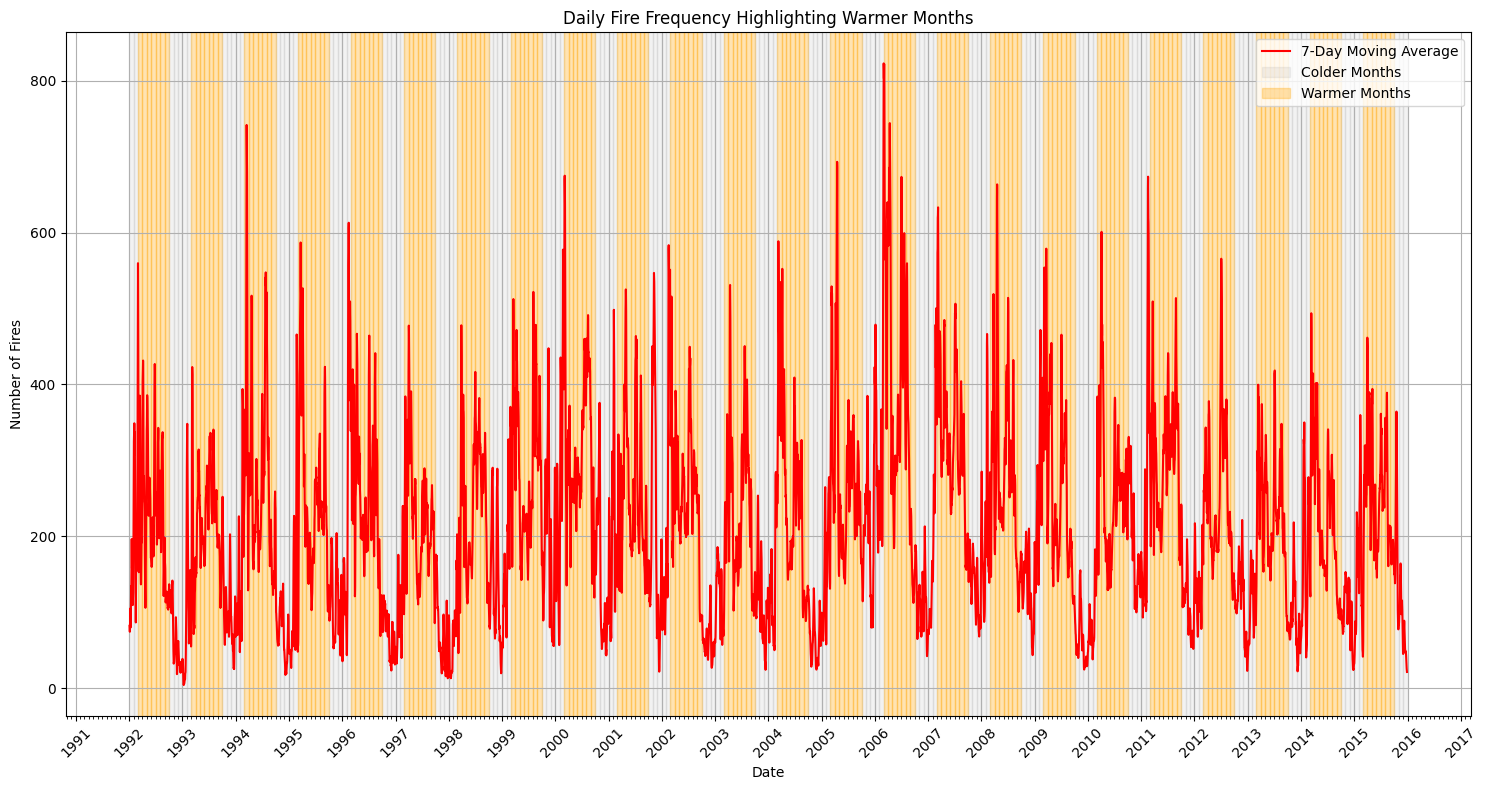

Figure saved at: ./Abbildungen/daily_fire_frequency.png


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import os


# Get the current working directory
base_dir = os.getcwd()  # Get the current working directory
file_path = os.path.join(base_dir, 'Data_Waldbrand_Zeitreihen', 'fires_data.csv')


df = pd.read_csv(file_path, low_memory=False)
df['DISCOVERY_DATE'] = pd.to_datetime(df['DISCOVERY_DATE'])

# Count the number of fires per day
df.set_index('DISCOVERY_DATE', inplace=True)
daily_fire_counts = df.resample('D').size()

# Apply a rolling window to smooth the data
smoothed_fire_counts = daily_fire_counts.rolling(window=7, center=True).mean()

# Plot the smoothed data
plt.figure(figsize=(15, 8))
plt.plot(smoothed_fire_counts, color='red', label='7-Day Moving Average')

# Highlight summer months (March to September) with a bright color and the rest with a darker color
start_date = smoothed_fire_counts.index.min()
end_date = smoothed_fire_counts.index.max()

current_date = start_date
while current_date < end_date:
    next_date = current_date + pd.DateOffset(months=1)  # Process month by month
    if current_date.month in [3, 4, 5, 6, 7, 8, 9]:  # Warmer months
        plt.axvspan(current_date, next_date, color='orange', alpha=0.3, label='Warmer Months')
    else:  # Colder months
        plt.axvspan(current_date, next_date, color='gray', alpha=0.1, label='Colder Months')
    current_date = next_date

# Customize the plot
plt.title('Daily Fire Frequency Highlighting Warmer Months')
plt.xlabel('Date')
plt.ylabel('Number of Fires')
plt.grid(True)

# Adjust x-axis ticks
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().xaxis.set_minor_locator(mdates.MonthLocator())
plt.xticks(rotation=45)

# Add legend and finalize
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))  # Remove duplicate labels
plt.legend(by_label.values(), by_label.keys())
plt.tight_layout()

# Save the figure to the specified folder
output_path = "./Abbildungen/daily_fire_frequency.png"
plt.savefig(output_path, dpi=300)
plt.show()

print(f"Figure saved at: {output_path}")


# Erstellung von Abbildungen: Häufigkeit von Bränden in verschiedenen Zeiträumen

Dieser Code erstellt Abbildungen, die die **Häufigkeit von Bränden** in drei verschiedenen Zeiträumen darstellen:

1. **Tägliche Brandhäufigkeit**
2. **Monatliche Brandhäufigkeit**
3. **Jährliche Brandhäufigkeit**

Die generierten Abbildungen werden automatisch im Ordner **"Abbildungen"** mit den folgenden Namen gespeichert:
- `daily_fire_frequencies.png` für die tägliche Häufigkeit.
- `monthly_fire_frequencies.png` für die monatliche Häufigkeit.
- `yearly_fire_frequencies.png` für die jährliche Häufigkeit.


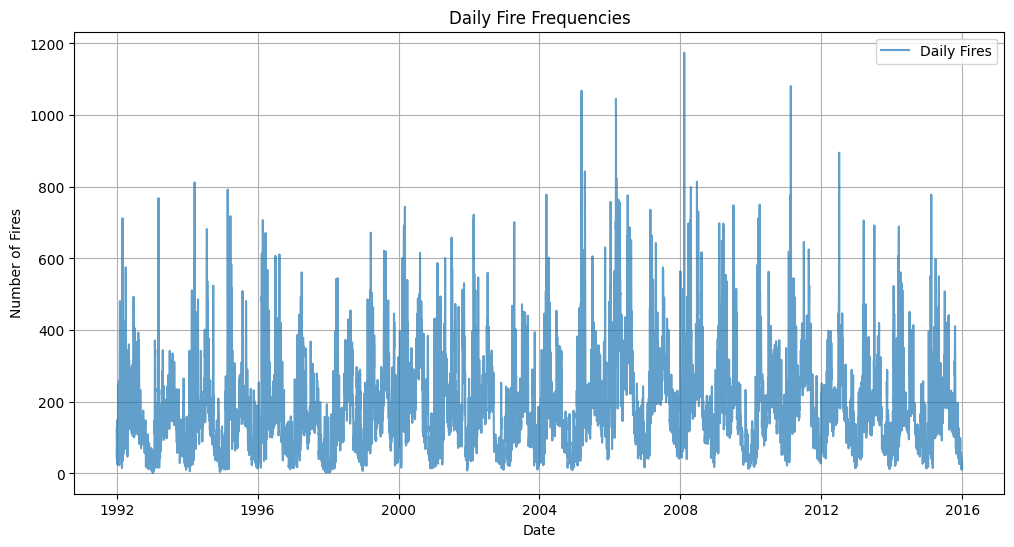

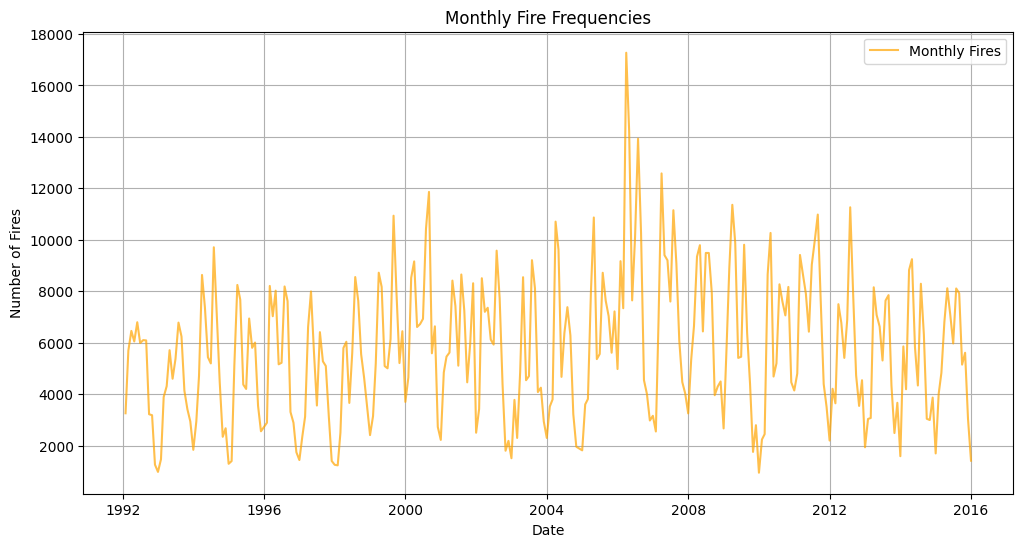

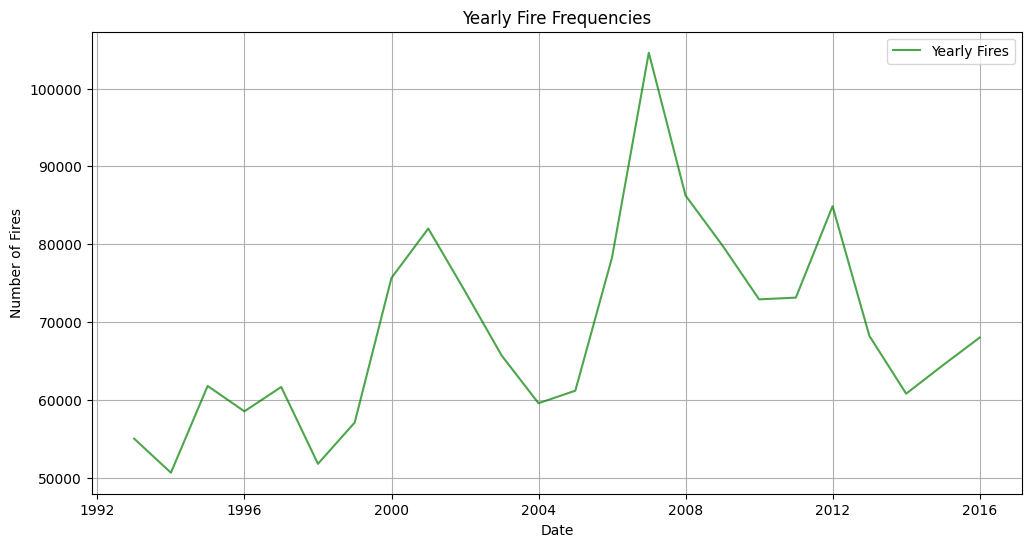

Plots saved:
- ./Abbildungen/daily_fire_frequencies.png
- ./Abbildungen/monthly_fire_frequencies.png
- ./Abbildungen/yearly_fire_frequencies.png


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# File paths
daily_file = './Data_Waldbrand_Zeitreihen/daily_fire_counts.csv'
monthly_file = './Data_Waldbrand_Zeitreihen/monthly_fire_counts.csv'
yearly_file = './Data_Waldbrand_Zeitreihen/yearly_fire_counts.csv'

# Load and standardize the daily fire counts data
daily_data = pd.read_csv(daily_file)
daily_data.rename(columns={"DISCOVERY_DATE": "Date", "Daily Fire Counts": "Fire_Count"}, inplace=True)
daily_data['Date'] = pd.to_datetime(daily_data['Date'])

# Load and standardize the monthly fire counts data
monthly_data = pd.read_csv(monthly_file)
monthly_data.rename(columns={"DISCOVERY_DATE": "Date", "Monthly Fire Counts": "Fire_Count"}, inplace=True)
monthly_data['Date'] = pd.to_datetime(monthly_data['Date'])

# Load and standardize the yearly fire counts data
yearly_data = pd.read_csv(yearly_file)
yearly_data.rename(columns={"DISCOVERY_DATE": "Date", "Yearly Fire Counts": "Fire_Count"}, inplace=True)
yearly_data['Date'] = pd.to_datetime(yearly_data['Date'])

# Plot daily fire frequencies
plt.figure(figsize=(12, 6))
plt.plot(daily_data['Date'], daily_data['Fire_Count'], label='Daily Fires', alpha=0.7)
plt.title('Daily Fire Frequencies')
plt.xlabel('Date')
plt.ylabel('Number of Fires')
plt.grid()
plt.legend()
daily_plot_path = './Abbildungen/daily_fire_frequencies.png'
plt.savefig(daily_plot_path)
plt.show()  # Display the plot in the notebook

# Plot monthly fire frequencies
plt.figure(figsize=(12, 6))
plt.plot(monthly_data['Date'], monthly_data['Fire_Count'], label='Monthly Fires', color='orange', alpha=0.7)
plt.title('Monthly Fire Frequencies')
plt.xlabel('Date')
plt.ylabel('Number of Fires')
plt.grid()
plt.legend()
monthly_plot_path = './Abbildungen/monthly_fire_frequencies.png'
plt.savefig(monthly_plot_path)
plt.show()  # Display the plot in the notebook

# Plot yearly fire frequencies
plt.figure(figsize=(12, 6))
plt.plot(yearly_data['Date'], yearly_data['Fire_Count'], label='Yearly Fires', color='green', alpha=0.7)
plt.title('Yearly Fire Frequencies')
plt.xlabel('Date')
plt.ylabel('Number of Fires')
plt.grid()
plt.legend()
yearly_plot_path = './Abbildungen/yearly_fire_frequencies.png'
plt.savefig(yearly_plot_path)
plt.show()  # Display the plot in the notebook

print(f"Plots saved:\n- {daily_plot_path}\n- {monthly_plot_path}\n- {yearly_plot_path}")


## Täglich "Log Fire counts" Verteilung

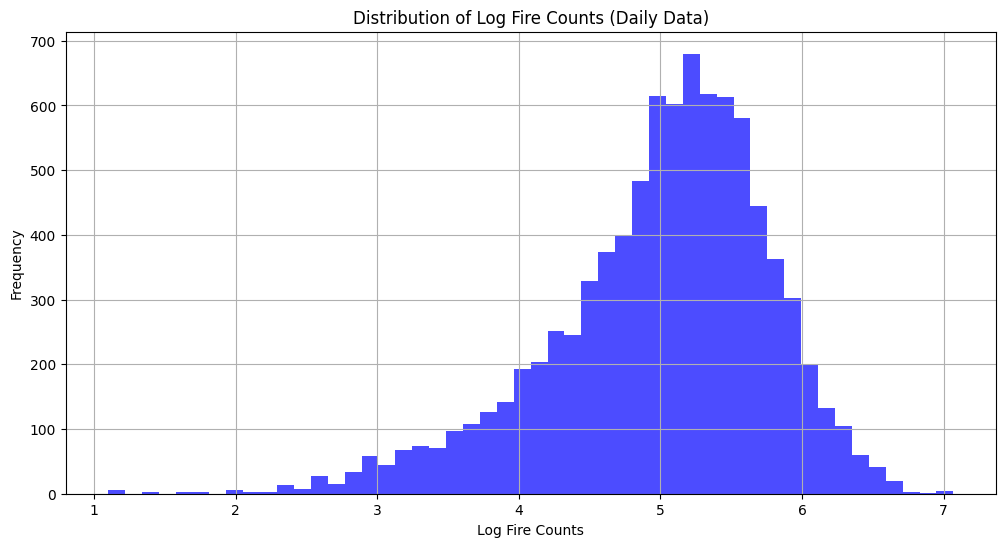

Plot saved:
- ./Abbildungen/log_fire_counts_distribution.png
Skewness: -0.8502724731417212


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# File path
daily_file = './Data_Waldbrand_Zeitreihen/daily_fire_counts.csv'

# Load and standardize the daily fire counts data
daily_data = pd.read_csv(daily_file)
daily_data.rename(columns={"DISCOVERY_DATE": "Date", "Daily Fire Counts": "Fire_Count"}, inplace=True)
daily_data['Date'] = pd.to_datetime(daily_data['Date'])

# Distribution of Log Fire Counts for Daily Data
daily_data['Log_Fire_Count'] = daily_data['Fire_Count'].apply(lambda x: np.log1p(x))
plt.figure(figsize=(12, 6))
plt.hist(daily_data['Log_Fire_Count'], bins=50, alpha=0.7, color='blue')
plt.title('Distribution of Log Fire Counts (Daily Data)')
plt.xlabel('Log Fire Counts')
plt.ylabel('Frequency')
plt.grid()
log_distribution_plot_path = './Abbildungen/log_fire_counts_distribution.png'
plt.savefig(log_distribution_plot_path)
plt.show()

print(f"Plot saved:\n- {log_distribution_plot_path}")

#
skewness = daily_data['Log_Fire_Count'].skew()
print(f"Skewness: {skewness}")



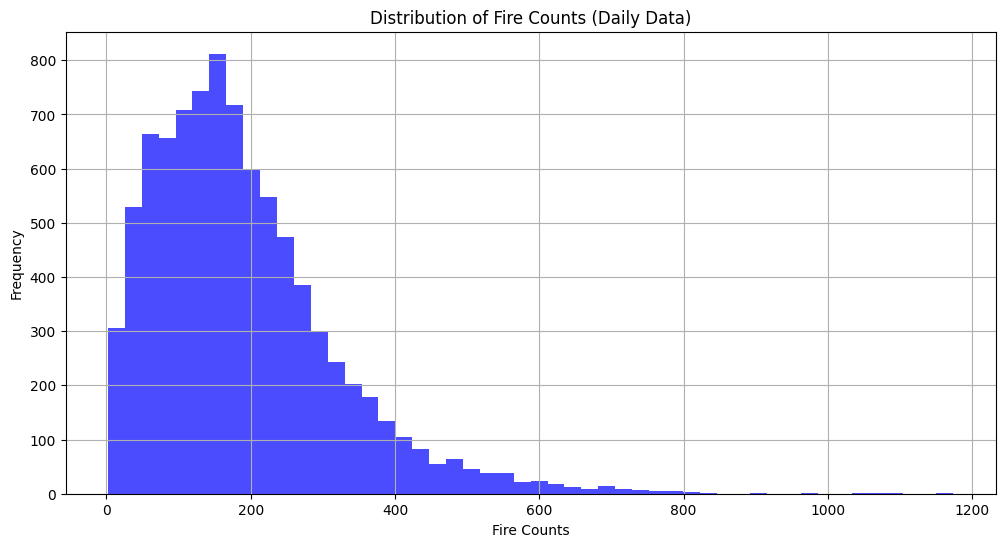

Plot saved:
- ./Abbildungen/not_transformed_fire_counts_distribution.png
Skewness: 1.4062496079193298


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# File path
daily_file = './Data_Waldbrand_Zeitreihen/daily_fire_counts.csv'

# Load and standardize the daily fire counts data
daily_data = pd.read_csv(daily_file)
daily_data.rename(columns={"DISCOVERY_DATE": "Date", "Daily Fire Counts": "Fire_Count"}, inplace=True)
daily_data['Date'] = pd.to_datetime(daily_data['Date'])

# Distribution of Log Fire Counts for Daily Data
daily_data['Log_Fire_Count'] = daily_data['Fire_Count'].apply(lambda x: np.log1p(x))
plt.figure(figsize=(12, 6))
plt.hist(daily_data['Fire_Count'], bins=50, alpha=0.7, color='blue')
plt.title('Distribution of Fire Counts (Daily Data)')
plt.xlabel('Fire Counts')
plt.ylabel('Frequency')
plt.grid()
log_distribution_plot_path = './Abbildungen/not_transformed_fire_counts_distribution.png'
plt.savefig(log_distribution_plot_path)
plt.show()

print(f"Plot saved:\n- {log_distribution_plot_path}")

#
skewness = daily_data['Fire_Count'].skew()
print(f"Skewness: {skewness}")

